# Lab One: Exploring Table Data
Team: Jack Babcock, Hayden Center, Fidelia Navar, Amory Weinzierl

### Assignment Description
You are to perform preprocessing and exploratory analysis of a data set: exploring the statistical summaries of the features, visualizing the attributes, and addressing data quality. This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output.

Additional information and requirements can be found at https://smu.instructure.com/courses/81978/assignments/465788

## Part I -  Business Understanding

The data set (which can be found at https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) that we have chosen to utilize for this lab consists of data that may be used to identify whether or not an individual is at risk for strokes. 

## Part II - Data Understanding

### Data Description

#### Importing

In [1]:
import numpy as np
import pandas as pd

print('Pandas:', pd.__version__)
print('Numpy:',  np.__version__)

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()

Pandas: 1.1.3
Numpy: 1.19.2


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Formatting

To clean up the data a little bit, we're going to normalize the values of the non-numeric columns to have the same format by setting all values to lowercase and replacing spaces with underscores.

In [2]:
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].str.lower()
        
df = df.replace(' ', '_', regex=True)
        
for c in df.columns:
    if df[c].dtype == 'object':
        print(df[c].unique())

['male' 'female' 'other']
['yes' 'no']
['private' 'self-employed' 'govt_job' 'children' 'never_worked']
['urban' 'rural']
['formerly_smoked' 'never_smoked' 'smokes' 'unknown']


All of the columns look good except for the smoking_status column. One of the values in that column is listed as 'unknown'. Though this is technically a value, what it is actually representing is missing information, so let's make that more clear.

In [3]:
df.smoking_status.mask(df.smoking_status == 'unknown', pd.NA, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


Some of the categorical columns should be converted into numerical columns. Specifically the ever_married column should be converted into a binary column similar to the hypertension, heart_disease, and stroke columns, and the smoking_status column should be converted into an ordinal. We think this is a meaningful change because there is a very clear way to assign an order to the values: never_smoked is 0, formerly_smoked is 1 since it is worse for your health, and finally smokes is 2, since it is worse than formerly_smoked.

In [4]:
df.smoking_status.replace(to_replace= ['never_smoked', 'formerly_smoked', 'smokes'], value = [0, 1, 2], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Data Quality

#### Duplicate Values

The first thing we'll want to do to check the quality of the data is to check for duplicates. First, let's make sure there are no duplicate IDs in the dataset.

In [5]:
if df.id.unique().size == df.id.size:
    print("No duplicate IDs")

No duplicate IDs


Now that we know there are no duplicate IDs, let's check if there are any rows with identical values (excluding the ID).

In [6]:
cols = df.columns.drop('id')

s = df.duplicated(subset=cols, keep='first')

s[s]

Series([], dtype: bool)

Seems like the dataset has no exact duplicates. We feel safe assuming that, finding no exact duplicates, each entry in the dataset is unique.

#### Missing Values

The second thing to check the dataset for is missing values. We can see them by checking df.info().

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Now we can see how much data is really missing from this dataset. We have over 1500 missing datapoints from the smoking_status column. Now let's take a look at both of the columns with missing data and see if we want to impute or delete them.

In [8]:
from sklearn.impute import KNNImputer
import copy

knn = KNNImputer(n_neighbors=3)

temp = df[[
    'age',
    'hypertension',
    'heart_disease',
    'avg_glucose_level',
    'bmi',
    'stroke'
]].to_numpy()

temp_imputed = knn.fit_transform(temp)

df_imputed = copy.deepcopy(df)
df_imputed[[
    'age',
    'hypertension',
    'heart_disease',
    'avg_glucose_level',
    'bmi',
    'stroke'
]] = temp_imputed
# df_imputed.info()

df_imputed.bmi = df_imputed.bmi.apply(lambda x: round(x, 1))

print(df_imputed.count())

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
residence_type       5110
avg_glucose_level    5110
bmi                  5110
smoking_status       3566
stroke               5110
dtype: int64


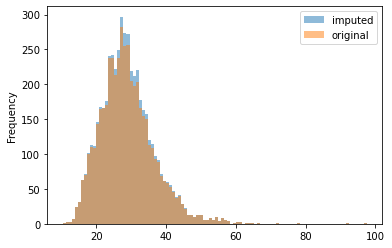

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

df_imputed.bmi.plot(kind='hist', alpha=0.5, label="imputed",bins=100)
df.bmi.plot(kind='hist', alpha=0.5, label="original",bins=100)
plt.legend()
plt.show()

## Part III - Data Visualization

### Visualize basic feature distributions (5 plots).


Text(0.5, 1.0, 'Age / Stroke')

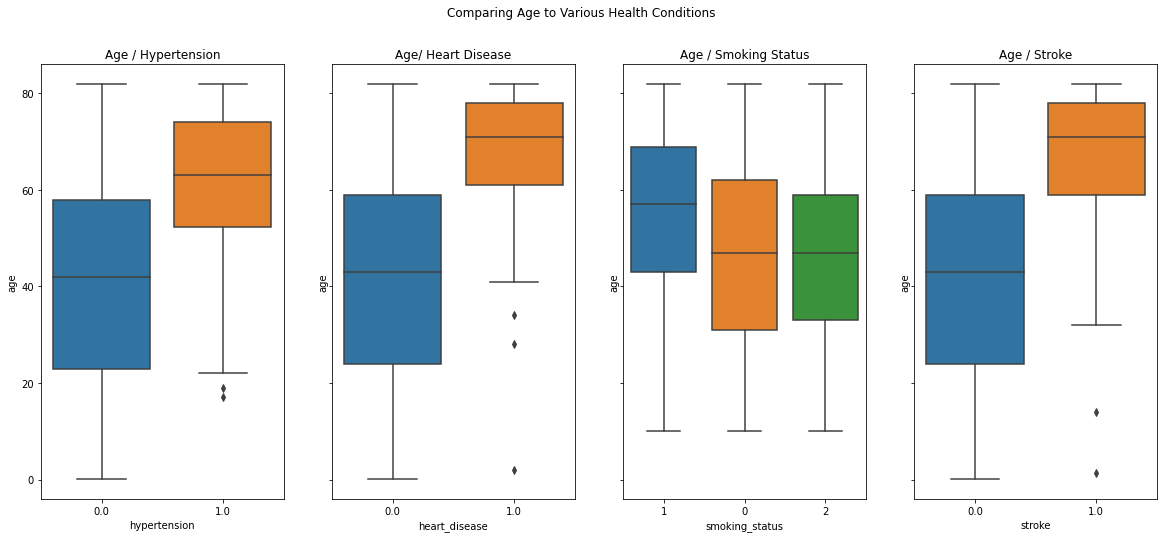

In [14]:
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharey=True)
fig.suptitle('Comparing Age to Various Health Conditions')

# Bulbasaur
sns.boxplot(ax = axes[0], x="hypertension", y="age", data=df_imputed)
axes[0].set_title('Age / Hypertension')

# Charmander
sns.boxplot(ax = axes[1], x="heart_disease", y="age", data=df_imputed)
axes[1].set_title('Age/ Heart Disease')

# Squirtle
sns.boxplot(ax = axes[2], x="smoking_status", y="age", data=df_imputed)
axes[2].set_title('Age / Smoking Status')

sns.boxplot(ax = axes[3], x="stroke", y="age", data=df_imputed)
axes[3].set_title('Age / Stroke')

This boxplot shows the relationship between age and various health conditions such as hypertension, heart disease, smoking, and occurrences of stroke. By analyzing the data, we can see how the majority of people with hypertension and heart disease fall into similar age groups (between about 50 to 80 years of age). This same age group is apparent with the people who have had a stroke before as well - they fall into the 60-80 years of age (for the majority). Smoking did not have as much of a strong relationship to any of the other conditions, but we can conclude that people who were smokers were generally above 35. We can also see another trend with smoking habits - those who are older were more likely to formerly smoke than those who are younger, who currently smoke. This can allow us to conclude how an older age factors into the occurrence of more health conditions like strokes, hypertension, and heart disease. 

stroke                         False      True 
hypertension ever_married                      
0.0          no            98.943662   1.056338
             yes           94.325997   5.674003
1.0          no            79.245283  20.754717
             yes           87.640449  12.359551

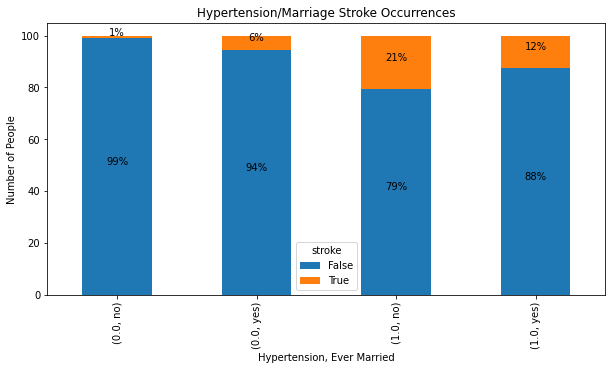

In [187]:
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
# let's manipulate the example to serve our purposes

ax= pd.crosstab([df_imputed['hypertension'],df_imputed['ever_married']], df_imputed.stroke.astype(bool)).apply(lambda r: r/r.sum()*100, axis=1)
ax_ = ax.plot.bar(figsize=(10,5),stacked=True)
display(ax)

for rec in ax_.patches:
    height = rec.get_height()
    ax_.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.title('Hypertension/Marriage Stroke Occurrences')
plt.xlabel('Hypertension, Ever Married')
plt.ylabel('Number of People')
plt.show()

This visual was used to understand the relationship between individuals having hypertension, ever being married, and having a stroke. The data shows that those who do not have hypertension and have never been married have the lowest percentage of strokes, whereas those with hypertension and no marriage have the highest percentage of strokes. This visual provides an interesting representation because one might expect individuals who have been married and have hypertension to have the greatest chance of stroke, but this data does not allow us to conclude that. The data shows that the highest occurrences of stroke happened in those who had hypertension and were never married (21%). This allows us to consider questions about how different social experiences we go through may or may not affect our health conditions.

<plot 3>

<plot 4>

<plot 5>

### Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data. Important: Interpret the implications for each visualization.

**Question 1: What is more influential feature for stroke likelihood: hypertension, heart disease, or smoking status?**

stroke,False,True
hypertension,,
0.0,96.032090,3.967910
1.0,86.746988,13.253012


stroke,False,True
heart_disease,,
0.0,95.821266,4.178734
1.0,82.971014,17.028986


stroke,False,True
smoking_status,,
0,95.243129,4.756871
1,92.090395,7.909605
2,94.676806,5.323194


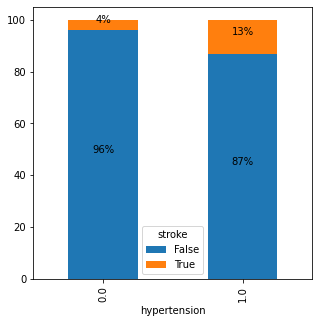

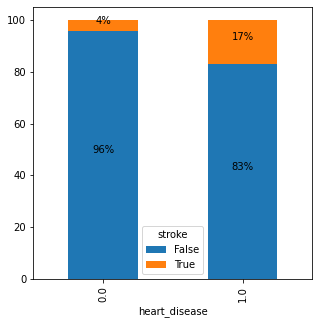

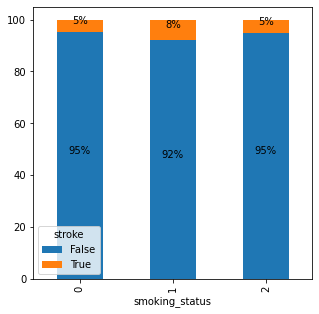

In [24]:
# plot overall cross tab with both groups

import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter

# plt.figure(figsize=(15,3))
# ax1 = plt.subplot(1,3,1)
# ax2 = plt.subplot(1,3,2)
# ax3 = plt.subplot(1,3,3)

ax1= pd.crosstab([df_imputed['hypertension']],df_imputed.stroke.astype(bool)).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax1.plot.bar(figsize=(5,5),stacked=True)
# display(ax1)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

ax2= pd.crosstab([df_imputed['heart_disease']],df_imputed.stroke.astype(bool)).apply(lambda r: r/r.sum()*100, axis=1)
ax_2 = ax2.plot.bar(figsize=(5,5),stacked=True)
# display(ax2)

for rec in ax_2.patches:
    height = rec.get_height()
    ax_2.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

ax3 = pd.crosstab([df_imputed['smoking_status']],df_imputed.stroke.astype(bool)).apply(lambda r: r/r.sum()*100, axis=1)
ax_3 = ax3.plot.bar(figsize=(5,5),stacked=True)
# display(ax3)

display(ax1, ax2, ax3)
for rec in ax_3.patches:
    height = rec.get_height()
    ax_3.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

By observing the percentages on each chart, we can see how there was about 13% and 17% of individuals with hypertension and heart disease, respectively, who also had a stroke. The values for smoking status are lower - those who formerly smoked have a higher percentage of strokes, whereas those who never smoked or currently smoke have the same percentages of stroke occurrences. Therefore, we can conclude that heart disease was probably the strongest influencing factor for the likelihood of a stroke, compared to the other two health conditions.

**Question 2: Does the combination of different health conditions indicate a higher likelihood of having a stroke?**

stroke                          False      True 
hypertension heart_disease                      
0.0          0.0            96.613636   3.386364
             1.0            83.962264  16.037736
1.0          0.0            87.788018  12.211982
             1.0            79.687500  20.312500

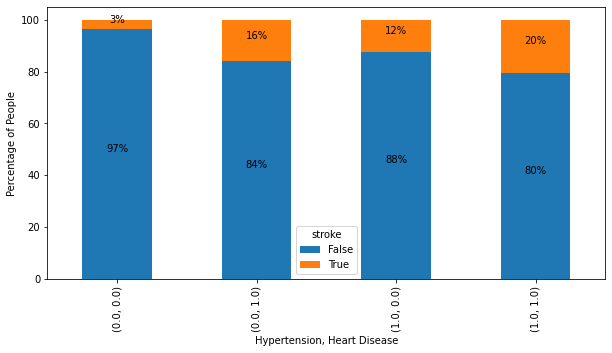

In [178]:
# plot overall cross tab with both groups

ax1= pd.crosstab([df_imputed['hypertension'], df_imputed['heart_disease']],df_imputed.stroke.astype(bool)).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax1.plot.bar(figsize=(10,5),stacked=True)
display(ax1)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.ylabel('Percentage of People')
plt.xlabel('(Hypertension, Heart Disease)')

plt.show()

stroke                           False      True 
hypertension smoking_status                      
0.0          0               96.506024   3.493976
             1               93.333333   6.666667
             2               95.539568   4.460432
1.0          0               86.206897  13.793103
             1               84.166667  15.833333
             2               88.297872  11.702128

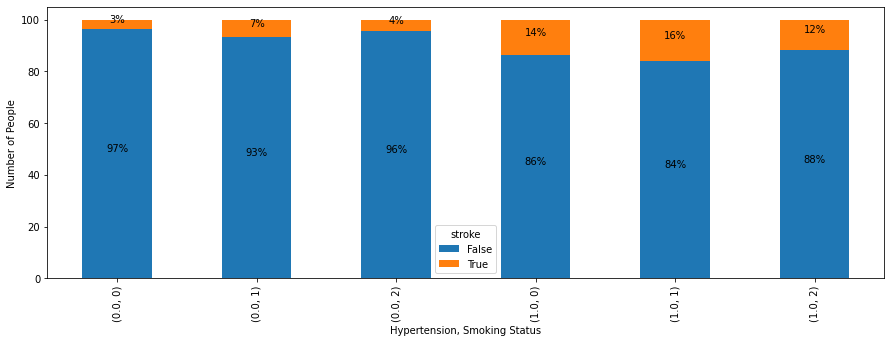

In [179]:
ax2= pd.crosstab([df_imputed['hypertension'], df_imputed['smoking_status']],df_imputed.stroke.astype(bool)).apply(lambda r: r/r.sum()*100, axis=1)
ax_2 = ax2.plot.bar(figsize=(15,5),stacked=True)
display(ax2)

for rec in ax_2.patches:
    height = rec.get_height()
    ax_2.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.ylabel('Number of People')
plt.xlabel('(Hypertension, Smoking Status)')

plt.show()

stroke                            False      True 
heart_disease smoking_status                      
0.0           0               95.671476   4.328524
              1               92.821782   7.178218
              2               96.291209   3.708791
1.0           0               86.666667  13.333333
              1               84.415584  15.584416
              2               75.409836  24.590164

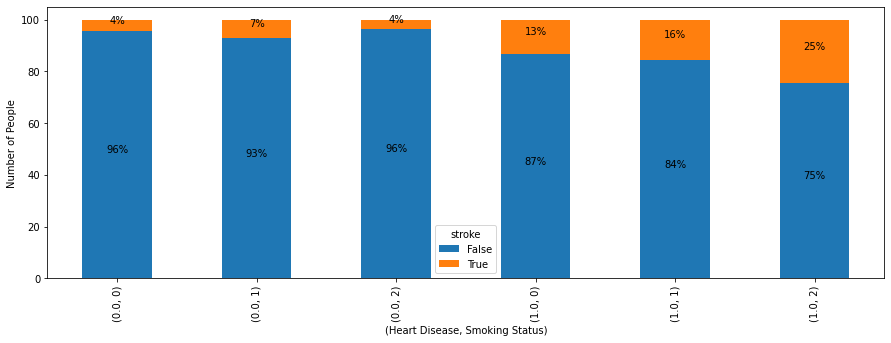

In [15]:
ax3= pd.crosstab([df_imputed['heart_disease'], df_imputed['smoking_status']],df_imputed.stroke.astype(bool)).apply(lambda r: r/r.sum()*100, axis=1)
ax_3 = ax3.plot.bar(figsize=(15,5),stacked=True)
display(ax3)

for rec in ax_3.patches:
    height = rec.get_height()
    ax_3.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.ylabel('Number of People')
plt.xlabel('(Heart Disease, Smoking Status)')

plt.show()

We can see how those with both heart disease and a current smoking habit have the highest percentage of having a stroke (25%) compared to any other combination of health conditions. The second-largest percentage came from those who have hypertension and heart disease, proving how the combination of the two conditions may contribute to a higher chance of having a stroke. It also seems that those with neither hypertension nor heart_disease but have/had smoking habits had fairly low percentages of having a stroke. Those with heart disease and previous/current smoking habits have a greater chance of having a stroke compared to those with hypertension and previous/current smoking habits. We can conclude that those with combinations of diseases generally had a greater chance of having a stroke, with the combination of smoking and heart_disease being the more likely combination for a stroke, followed by hypertension and heart disease.

**Question 3:**

## Part IV - Exceptional Work